<a href="https://colab.research.google.com/github/abdullatif14/Core_IP_Last_Week/blob/main/Dimentionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA

In [1]:
# Reading the data

sup <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")
head(sup, 5)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


In [19]:
str(sup)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ g

In [2]:
# choosing the classes to deal with 
sales <- sup[,c(5:16)]
head(sales)

,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [3]:
# Lets do some basic data cleaning
#1 lets check for any missing values
colSums(is.na(sales))

# checking for duplicates
duplicated <- sales[duplicated(sales),]
length(duplicated)

# checking for unique items
unique_items <- sales[!duplicated(sales), ]
# What about seeing what these unique items are?
# ---
length(unique_items)

Product.line              Unit.price                Quantity 
                      0                       0                       0 
                    Tax                    Date                    Time 
                      0                       0                       0 
                Payment                    cogs gross.margin.percentage 
                      0                       0                       0 
           gross.income                  Rating                   Total 
                      0                       0                       0

[1] 12

[1] 12

In [9]:
install.packages("dplyr")
library(dplyr)
sales %>% distinct()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165
Electronic accessories,68.84,6,20.6520,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,433.6920
Home and lifestyle,73.56,10,36.7800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,772.3800
Health and beauty,36.26,2,3.6260,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,76.1460


Checking for the unique values in our categorical values


In [10]:
x <- unique(sales$Payment)
x

[1] "Ewallet"     "Cash"        "Credit card"

In [16]:
x <- unique(sales$Product.line)
x


[1] "Health and beauty"      "Electronic accessories" "Home and lifestyle"    
[4] "Sports and travel"      "Food and beverages"     "Fashion accessories"

In [28]:
#Assigning the correct data types to columns with wrong data types.

sales$Product.line <- as.factor(sales$Product.line)
sales$Payment <- as.factor(sales$Payment)

In [29]:
str(sales)

'data.frame':	1000 obs. of  12 variables:
 $ Product.line           : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Time                   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Payment                : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...


In [35]:
# drop the columns with NaN values
sales$Time <- NULL
sales$Date <- NULL
sales$Payment <- NULL
sales$Product.line <- NULL
colnames(sales)

[1] "Unit.price"              "Quantity"               
[3] "Tax"                     "cogs"                   
[5] "gross.margin.percentage" "gross.income"           
[7] "Rating"                  "Total"

In [40]:
pca = prcomp(sales)
pca = prcomp(sales, center = F, scale = F)
summary(pca)

Importance of components:
                            PC1      PC2     PC3     PC4    PC5       PC6
Standard deviation     564.1074 28.98346 4.54274 1.42220 0.6752 4.468e-14
Proportion of Variance   0.9973  0.00263 0.00006 0.00001 0.0000 0.000e+00
Cumulative Proportion    0.9973  0.99993 0.99999 1.00000 1.0000 1.000e+00
                             PC7       PC8
Standard deviation     9.438e-15 1.706e-15
Proportion of Variance 0.000e+00 0.000e+00
Cumulative Proportion  1.000e+00 1.000e+00

In [41]:
# Calling str() to have a look at your PCA object
# ---
# 
str(pca)

List of 5
 $ sdev    : num [1:8] 564.107 28.983 4.543 1.422 0.675 ...
 $ rotation: num [1:8, 1:8] -0.09686 -0.00999 -0.03428 -0.68551 -0.00674 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:8] "Unit.price" "Quantity" "Tax" "cogs" ...
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : logi FALSE
 $ scale   : logi FALSE
 $ x       : num [1:1000, 1:8] -763 -112 -473 -679 -881 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:8] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [42]:
# We will now plot our pca. This will provide us with some very useful insights i.e. 
# 

# Installing our ggbiplot visualisation package
# 
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis





✔  checking for file ‘/tmp/RtmpLkBwQ2/remotes3a5e9b2ce8/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: scales

Loading required package: grid



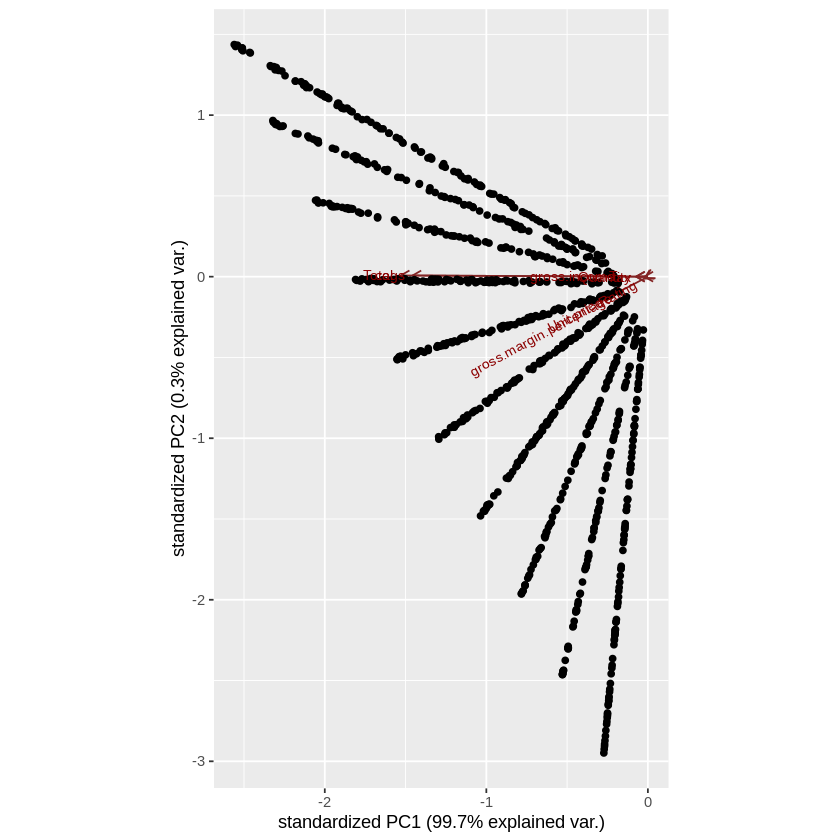

In [43]:
# Then Loading our ggbiplot library
#  
library(ggbiplot)
ggbiplot(pca)

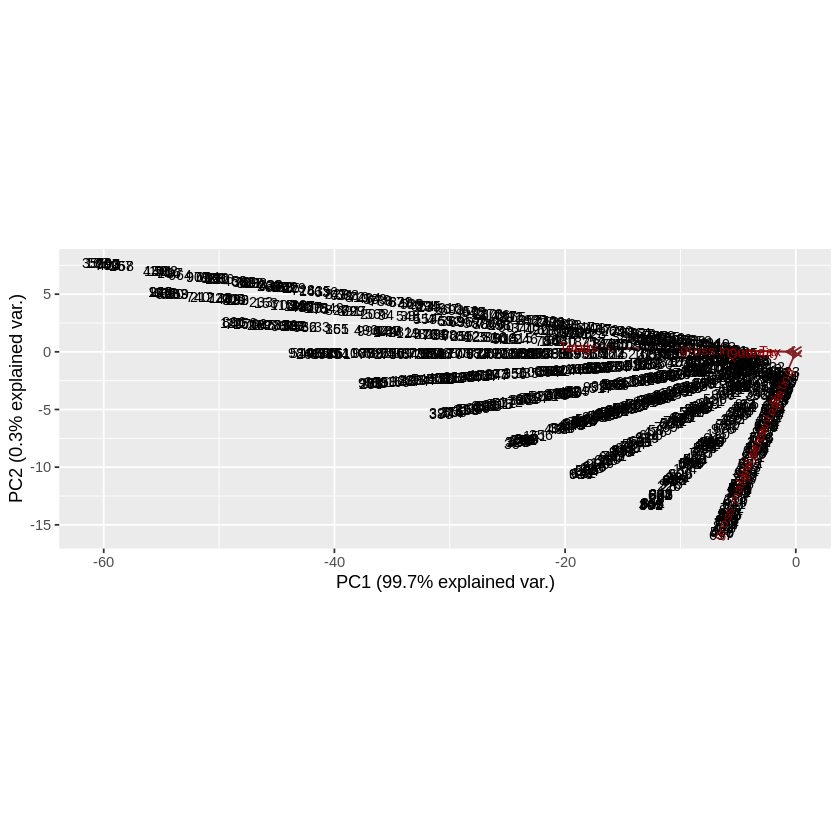

In [48]:
# Adding more detail to the plot, we provide arguments rownames as labels
# 
ggbiplot(pca, labels=rownames(sales), obs.scale = 0.5, var.scale = 0.5)


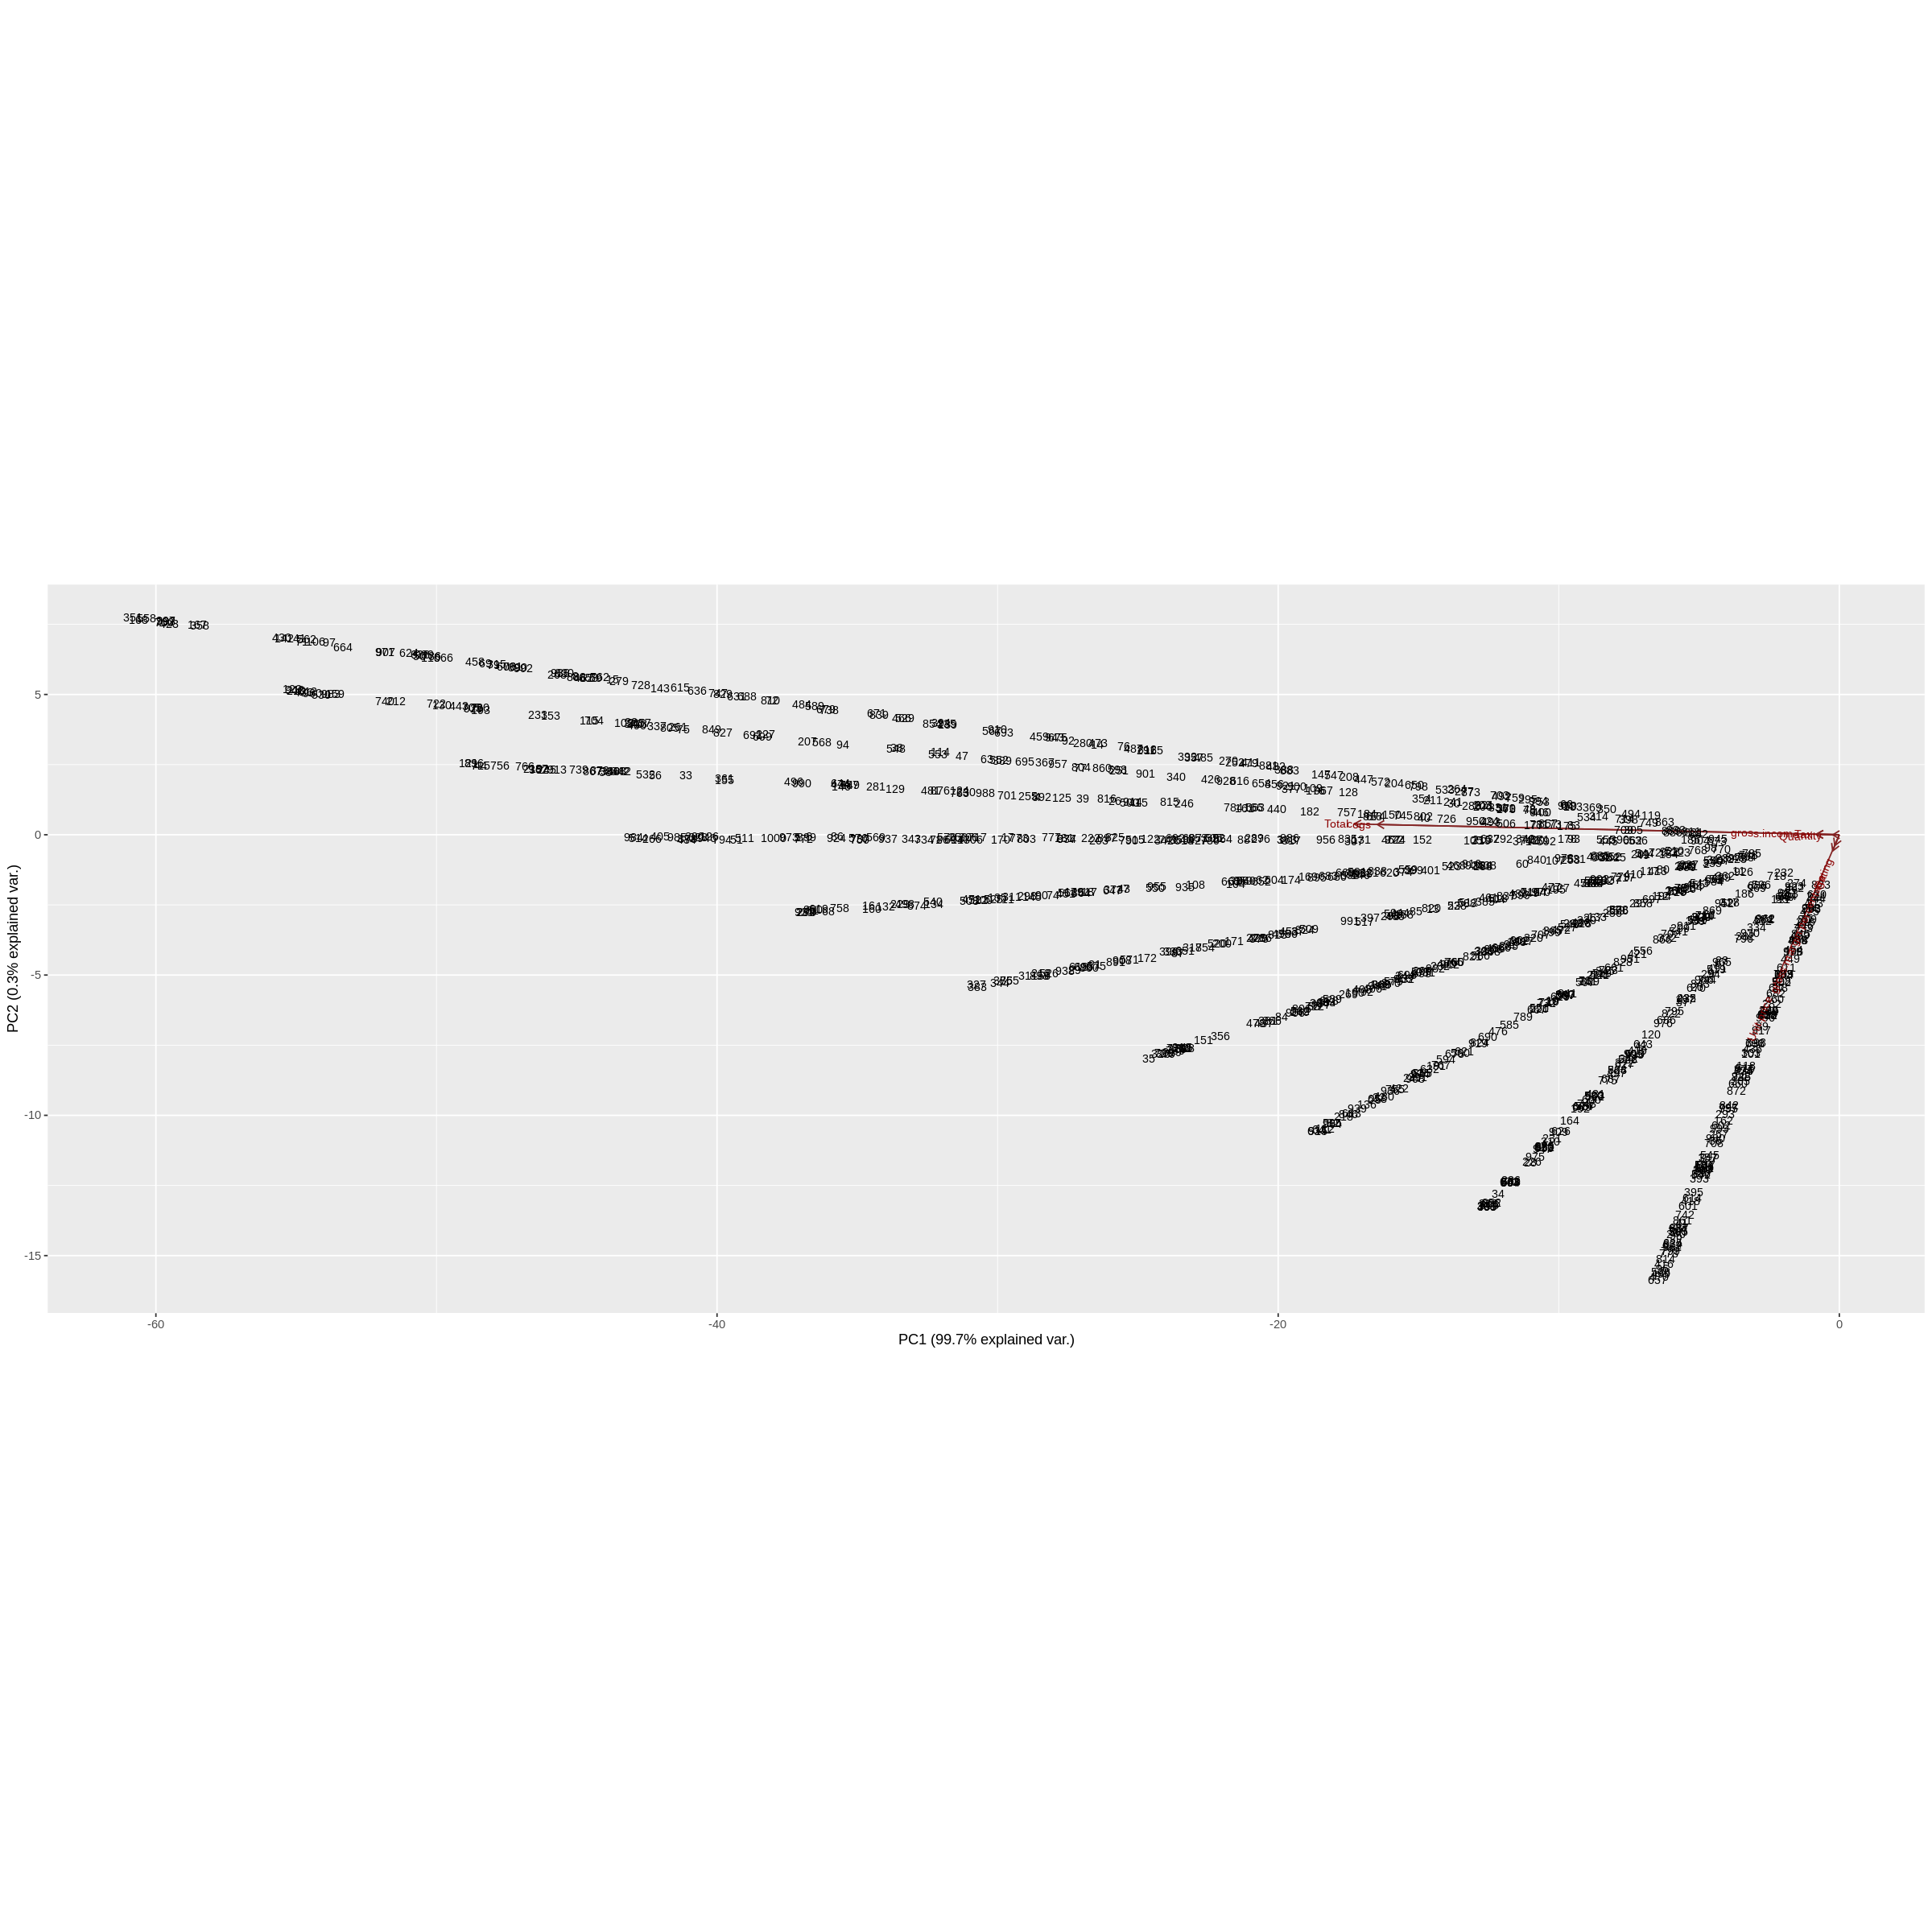

In [55]:

# Adding more detail to the plot, we provide arguments rownames as labels
# 
options(repr.plot.width = 20, repr.plot.height = 20)
ggbiplot(pca, labels=rownames(sales), obs.scale = 0.5, var.scale = 0.5)